In [1]:
import sys
sys.path.append('../')
from utils import *
import librosa
import pandas as pd
import json

### Read metadata file

In [2]:
f = open('Data/metadata-RagBah.json')
metadata = json.load(f)

In [3]:
# view metadata present in the file
# metadata

In [4]:
# Load vocal audio path #4 in RagBah
metadata['vocal_audio_path'] = 'Data/OSF/SSAudio/NIRP1_RamD_RagBah_Vox_3-SS.wav'
metadata['onset_file'] = 'Data/OSF/Annotations/NIRP1_RamD_RagBah_Vox_3.csv'

### Play the audio being analysed

In [5]:
playAudio(audioPath=metadata['vocal_audio_path'], startTime=metadata['start_time'], duration=metadata['duration'])

### Initialise and populate the figure

In [6]:
%%capture
# initialise figure, with 3 subplots
fig, axs = generateFig(4, (28, 10), [4, 5, 3, 4])

In [7]:
# plot waveplot
axs[0] = drawWave(audioPath=metadata['vocal_audio_path'], 
                  ax=axs[0], 
                  annotate=True, 
                  onsetPath=metadata['onset_file'], 
                  odf=True,
                  winSize_odf=640,
                  hopSize_odf=160, 
                  nFFT_odf=1024, 
                  source_odf='vocal')

# plot pitch contour
axs[1] = pitchContour(audioPath=metadata['vocal_audio_path'], 
                       minPitch=metadata['min_pitch'], 
                       maxPitch=metadata['max_pitch'], 
                       notes=metadata['notes'], 
                       tonic=metadata['tonic'], 
                       ax=axs[1], 
                       annotate=True, 
                       annotLabel=False, 
                       onsetPath=metadata['onset_file'])
# plot spetogram 2
axs[2] = spectrogram(audioPath=metadata['vocal_audio_path'], 
                     cmap='Blues', 
                     ax=axs[2], 
                     annotate=True, 
                     annotLabel=False,
                     onsetPath=metadata['onset_file'])
# plot energy contour
axs[3] = energyContour(audioPath=metadata['vocal_audio_path'], 
                    ax=axs[3], 
                    annotate=True, 
                    onsetPath=metadata['onset_file'], 
                    annotLabel=False,
                    xticks=True, 
                    freqXlabels=1)

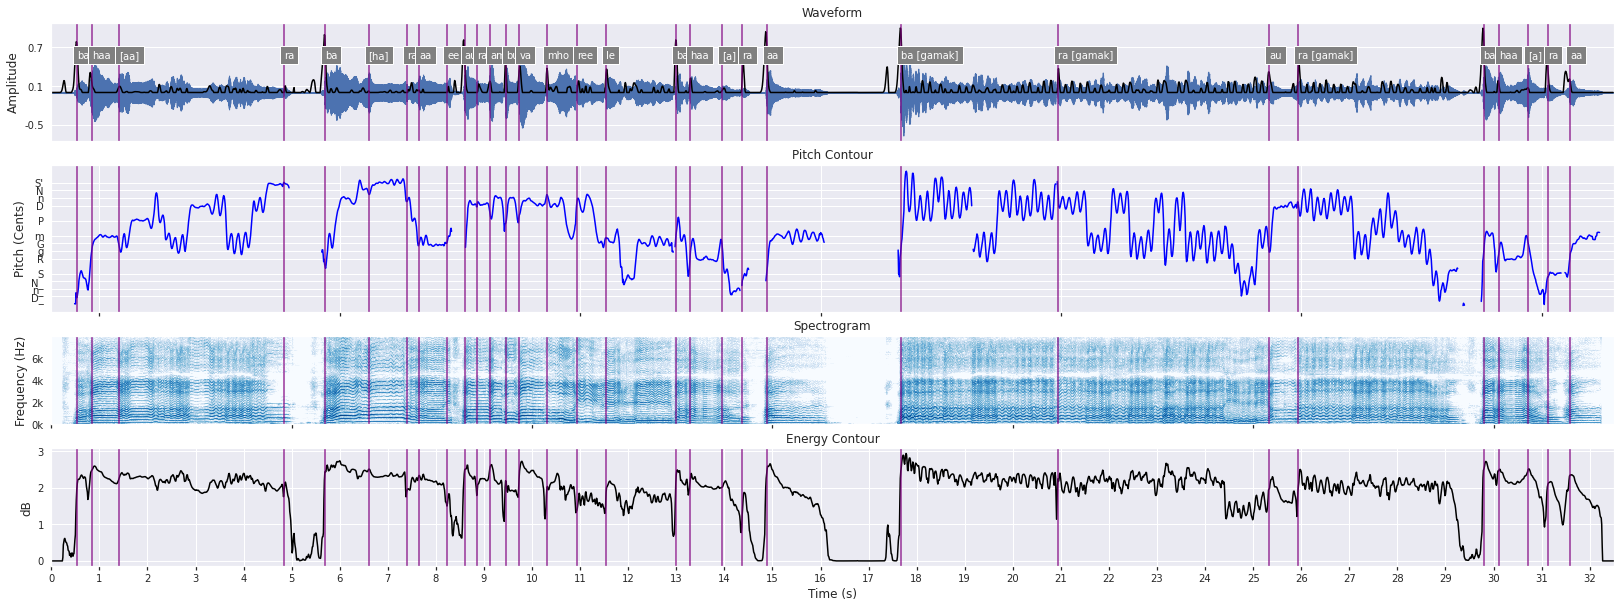

In [8]:
fig